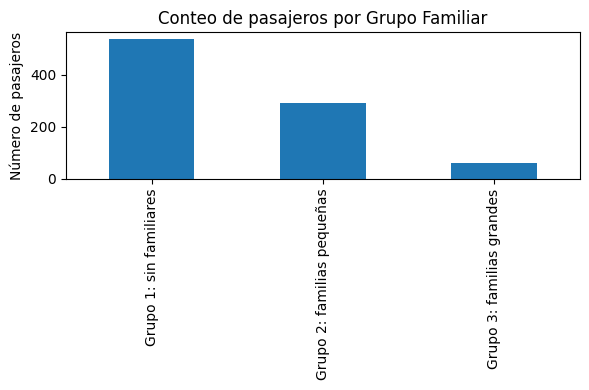

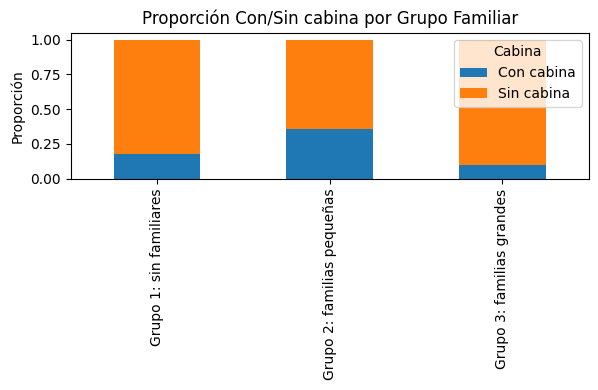

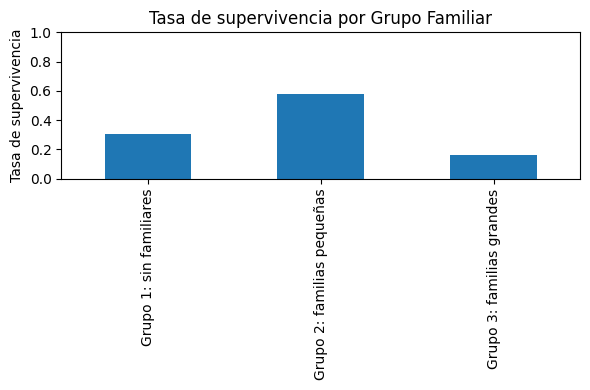

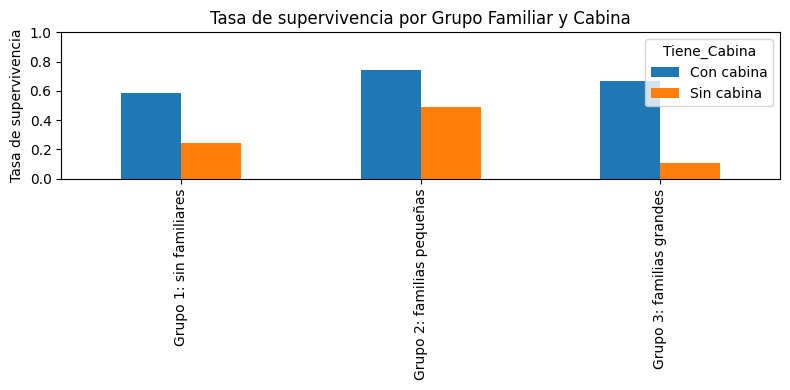


Conteos por Grupo Familiar:
 Grupo_Familiar
Grupo 1: sin familiares       537
Grupo 2: familias pequeñas    292
Grupo 3: familias grandes      62
Name: count, dtype: int64

Conteo Con/Sin Cabina por Grupo:
 Tiene_Cabina                Con cabina  Sin cabina
Grupo_Familiar                                    
Grupo 1: sin familiares             94         443
Grupo 2: familias pequeñas         104         188
Grupo 3: familias grandes            6          56

Proporción Con/Sin Cabina por Grupo:
 Tiene_Cabina                Con cabina  Sin cabina
Grupo_Familiar                                    
Grupo 1: sin familiares       0.175047    0.824953
Grupo 2: familias pequeñas    0.356164    0.643836
Grupo 3: familias grandes     0.096774    0.903226

Tasa de supervivencia por Grupo:
 Grupo_Familiar
Grupo 1: sin familiares       0.303538
Grupo 2: familias pequeñas    0.578767
Grupo 3: familias grandes     0.161290
Name: Survived, dtype: float64

Tasa de supervivencia por Grupo y Cabina:
 T

In [2]:
# 12. Investigue, realice y analice gr´aficos asociados al conjunto de datos resultante del item 6 que considere necesarios. Agregue una interpretaci´on de cada gr´afico. Ayuda: https://www.data-to-viz.com/

import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos (coloca train.csv en el mismo directorio)
df = pd.read_csv('../../data/train.csv')

# Preparación (ítem 6)
df["Familiares"] = df["SibSp"] + df["Parch"]
def clasificar_grupo(n):
    if n == 0:
        return "Grupo 1: sin familiares"
    elif 1 <= n <= 3:
        return "Grupo 2: familias pequeñas"
    else:
        return "Grupo 3: familias grandes"
df["Grupo_Familiar"] = df["Familiares"].apply(clasificar_grupo)
df["Tiene_Cabina"] = df["Cabin"].notna().map({True: "Con cabina", False: "Sin cabina"})

# Tablas resumen que usaremos en los gráficos
conteos_grupo = df["Grupo_Familiar"].value_counts().sort_index()
tabla_cabina = df.groupby(["Grupo_Familiar","Tiene_Cabina"]).size().unstack(fill_value=0)
tabla_cabina_prop = tabla_cabina.div(tabla_cabina.sum(axis=1), axis=0)
tasa_superv_grupo = df.groupby("Grupo_Familiar")["Survived"].mean().sort_index()
tabla_sup_cabina = df.groupby(["Grupo_Familiar","Tiene_Cabina"])["Survived"].mean().unstack()

# --- Gráfico 1: Conteo por Grupo Familiar ---
fig, ax = plt.subplots(figsize=(6,4))
conteos_grupo.plot(kind='bar', ax=ax)
ax.set_title("Conteo de pasajeros por Grupo Familiar")
ax.set_xlabel("")
ax.set_ylabel("Número de pasajeros")
plt.tight_layout()
plt.show()

# --- Gráfico 2: Proporción Con/Sin cabina por Grupo (apilado) ---
fig, ax = plt.subplots(figsize=(6,4))
tabla_cabina_prop.plot(kind='bar', stacked=True, ax=ax)
ax.set_title("Proporción Con/Sin cabina por Grupo Familiar")
ax.set_xlabel("")
ax.set_ylabel("Proporción")
plt.legend(title="Cabina")
plt.tight_layout()
plt.show()

# --- Gráfico 3: Tasa de supervivencia por Grupo Familiar ---
fig, ax = plt.subplots(figsize=(6,4))
tasa_superv_grupo.plot(kind='bar', ax=ax)
ax.set_title("Tasa de supervivencia por Grupo Familiar")
ax.set_xlabel("")
ax.set_ylabel("Tasa de supervivencia")
ax.set_ylim(0,1)
plt.tight_layout()
plt.show()

# --- Gráfico 4: Tasa de supervivencia por Grupo y Cabina (barras agrupadas) ---
fig, ax = plt.subplots(figsize=(8,4))
tabla_sup_cabina.plot(kind='bar', ax=ax)
ax.set_title("Tasa de supervivencia por Grupo Familiar y Cabina")
ax.set_xlabel("")
ax.set_ylabel("Tasa de supervivencia")
ax.set_ylim(0,1)
plt.tight_layout()
plt.show()

# Imprimir tablas resumen en consola
print("\nConteos por Grupo Familiar:\n", conteos_grupo)
print("\nConteo Con/Sin Cabina por Grupo:\n", tabla_cabina)
print("\nProporción Con/Sin Cabina por Grupo:\n", tabla_cabina_prop)
print("\nTasa de supervivencia por Grupo:\n", tasa_superv_grupo)
print("\nTasa de supervivencia por Grupo y Cabina:\n", tabla_sup_cabina)
